# Exams UAI 324 2024 

Marta LZW

# LZW Lempel Ziv Welch

# Lempel Ziv Welch compress algorithm

In [288]:
import iplantuml

# LZW Compression

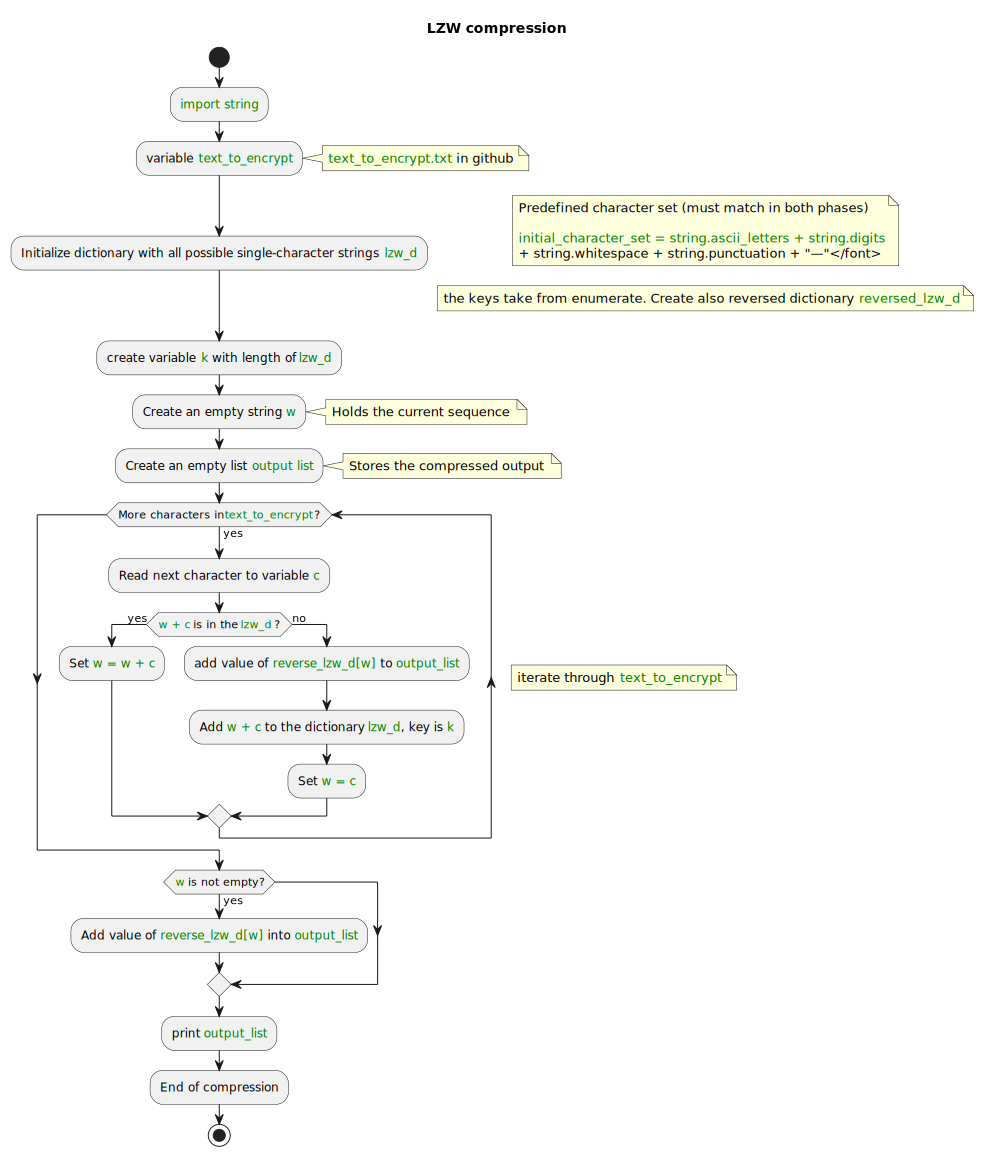

In [289]:
%%plantuml
@startuml
start
title LZW compression

:<font color=green>import string</font>;
:variable <font color=green>text_to_encrypt</font>;
    note right: <font color=green>text_to_encrypt.txt</font> in github
:Initialize dictionary with all possible single-character strings <font color=green>lzw_d</font>;
    note right: Predefined character set (must match in both phases)\n\n<font color=green>initial_character_set = string.ascii_letters + string.digits\n+ string.whitespace + string.punctuation + "—"</font>
    note right: the keys take from enumerate. Create also reversed dictionary <font color=green>reversed_lzw_d</font>
:create variable <font color=green>k</font> with length of <font color=green>lzw_d</font>;
:Create an empty string <font color=green>w</font>;
    note right: Holds the current sequence
:Create an empty list <font color=green>output list</font>;
    note right: Stores the compressed output

while (More characters in <font color=green>text_to_encrypt</font> ?) is (yes)
    note right: iterate through <font color=green>text_to_encrypt</font>
    :Read next character to variable <font color=green>c</font>;
    if (<font color=green>w + c</font> is in the <font color=green>lzw_d</font> ?) then (yes)
        :Set <font color=green>w = w + c</font>;
    else (no)
        :add value of <font color=green>reverse_lzw_d[w]</font> to <font color=green>output_list</font>;
        :Add <font color=green>w + c</font> to the dictionary <font color=green>lzw_d</font>, key is <font color=green>k</font>;
        :Set <font color=green>w = c</font>;
    endif
endwhile

if (<font color=green>w</font> is not empty?) then (yes)
    :Add value of <font color=green>reverse_lzw_d[w]</font> into <font color=green>output_list</font>;
endif
:print <font color=green>output_list</font>;
:End of compression;

stop
@enduml


# LZW Decompression

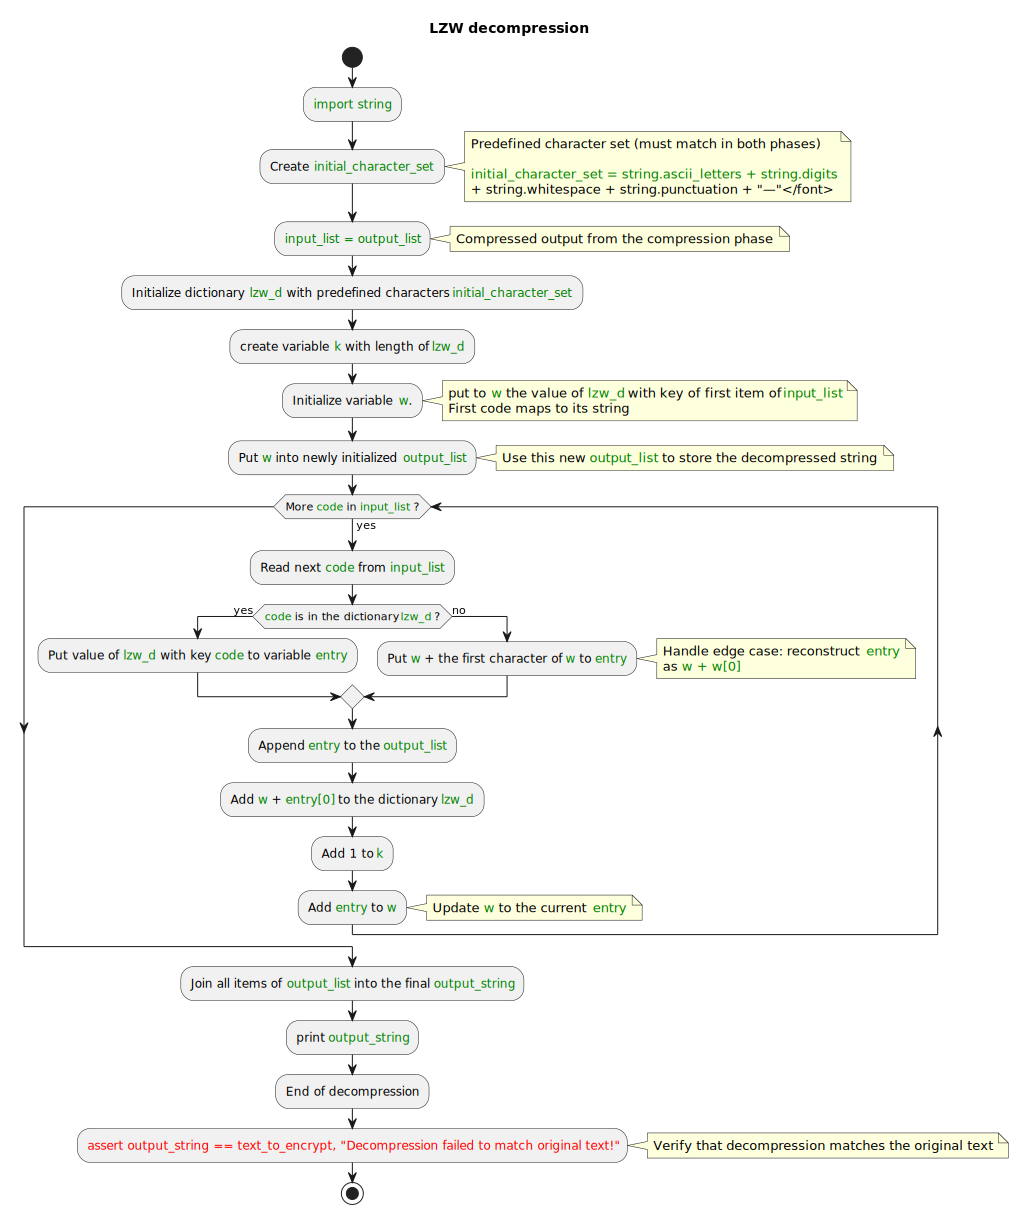

In [290]:
%%plantuml
@startuml
start
title LZW decompression

:<font color=green>import string</font>;
:Create <font color=green>initial_character_set</font>;
    note right: Predefined character set (must match in both phases)\n\n<font color=green>initial_character_set = string.ascii_letters + string.digits\n+ string.whitespace + string.punctuation + "—"</font>

:<font color=green>input_list = output_list</font>;
    note right: Compressed output from the compression phase
:Initialize dictionary <font color=green>lzw_d</font> with predefined characters <font color=green>initial_character_set</font>;
:create variable <font color=green>k</font> with length of <font color=green>lzw_d</font>;        
:Initialize variable <font color=green>w</font>.;
    note right: put to <font color=green>w</font> the value of <font color=green>lzw_d</font> with key of first item of <font color=green>input_list</font>\nFirst code maps to its string

:Put <font color=green>w</font> into newly initialized <font color=green>output_list</font>;  
    note right: Use this new <font color=green>output_list</font> to store the decompressed string        

while (More <font color=green>code</font> in <font color=green>input_list</font> ?) is (yes)
    :Read next <font color=green>code</font> from <font color=green>input_list</font>;
    if (<font color=green>code</font> is in the dictionary <font color=green>lzw_d</font> ?) then (yes)
        :Put value of <font color=green>lzw_d</font> with key <font color=green>code</font> to variable <font color=green>entry</font>;
    else (no)
        :Put <font color=green>w</font> + the first character of <font color=green>w</font> to <font color=green>entry</font>;
            note right: Handle edge case: reconstruct <font color=green>entry</font>\nas <font color=green>w + w[0]</font>
    endif

    :Append <font color=green>entry</font> to the <font color=green>output_list</font>;
    :Add <font color=green>w</font> + <font color=green>entry[0]</font> to the dictionary <font color=green>lzw_d</font>;
    :Add 1 to <font color=green>k</font>;
    :Add <font color=green>entry</font> to <font color=green>w</font>;
        note right: Update <font color=green>w</font> to the current <font color=green>entry</font>
endwhile

:Join all items of <font color=green>output_list</font> into the final <font color=green>output_string</font>;
:print <font color=green>output_string</font>;   
:End of decompression;
:<font color=red>assert output_string == text_to_encrypt, "Decompression failed to match original text!"</font>;
    note right: Verify that decompression matches the original text
stop
@enduml
